# Friday: Independent Project - Week 2

# Assessment


Financial Inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account.

Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enables households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other financial services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.

The research problem is to figure out how we can predict which individuals are most likely to have or use a bank account. Your solution will help provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.

In order to work on the above problem, you need to do the following:

Define the question, the metric for success, the context, experimental design taken and the appropriateness of the available data to answer the given question
Find and deal with outliers, anomalies, and missing data within the dataset.
Perform univariate, bivariate and multivariate analysis recording your observations.
Implement the solution by performing the respective analysis i.e. factor analysis, principal component analysis, and discriminant analysis.
Challenge your solution by providing insights on how you can make improvements.

# Dataset

The main dataset contains demographic information and what financial services are used by individuals across East Africa. This data was extracted from various Finscope surveys ranging from 2016 to 2018, and more information about these surveys can be found here:

FinAccess Kenya 2018. [Link] (Links to an external site.)
Finscope Rwanda 2016. [Link] (Links to an external site.)
Finscope Tanzania 2017. [Link] (Links to an external site.)
Finscope Uganda 2018. [Link] (Links to an external site.)
Dataset Files:

Variable Definitions: http://bit.ly/VariableDefinitions (Links to an external site.) 
Dataset: http://bit.ly/FinancialDataset (Links to an external site.) 

# 1. Defining the Question

 A) Specifiying the Data Analytic Question 

 *Which individuals are most likely to have or use a bank account.*




B) Defining the metric for Sucess

A clear definition of which demographic type(s) of East Africans have or could use bank account



C) Understanding the context 

The countries in question are closely situated in East African and have close economic ties

D) Recording the Experimental Design



E) Data Relevance

The data is still relevant as it was collected betwen 2016 and 2018, its currently 2021 

#2. Reading the Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

finDf = pd.read_csv("/content/Financial Dataset - 1.csv")


##3. Checking the data

In [2]:
#Number of records in the dataset
finDf.shape

(23524, 13)

In [3]:
#The top of the Dataset
finDf.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [4]:
#The bottom of the dataset
finDf.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [5]:
#checking each collums has an appropriate datatype
finDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


#4. External Data source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.


The surveys only collected data rom respondents who were of age 16 and olde, this is confimed by all the webpages of the surveys affirming this fact. We will confirm with the dataset

In [6]:
#Finding if any respondents age is below 16
(finDf['Respondent Age'] < 16).any()

False

#5. Tidying the dataset

In [7]:
#Checking for outliers
finDf.describe()


,year,household_size,Respondent Age
count,23524.000000,23496.000000,23490.000000
mean,2016.979000,3.681818,38.804300
std,0.899669,2.279933,16.519996
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


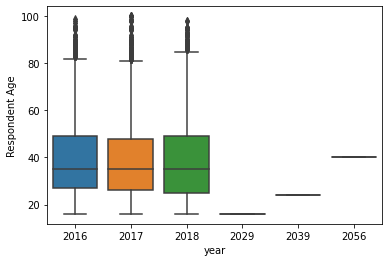

In [8]:
x = finDf['year']
y = finDf['Respondent Age']
sns.boxplot(x=x,y=y ,data= finDf)

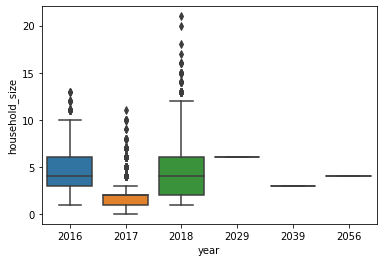

In [9]:
x = finDf['year']
y = finDf['household_size']
sns.boxplot(x=x,y=y ,data= finDf)

In [10]:
#Checking for missing data
finDf.isnull().any()

country                    True
year                      False
uniqueid                  False
Has a Bank account         True
Type of Location           True
Cell Phone Access          True
household_size             True
Respondent Age             True
gender_of_respondent       True
The relathip with head     True
marital_status             True
Level of Educuation        True
Type of Job                True
dtype: bool

In [11]:
#Identifing the null values
finDf.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [12]:
#dropping the null values
#there are 23,000 rows
dfE = finDf.dropna()
dfE.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23343 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23343 non-null  object 
 1   year                    23343 non-null  int64  
 2   uniqueid                23343 non-null  object 
 3   Has a Bank account      23343 non-null  object 
 4   Type of Location        23343 non-null  object 
 5   Cell Phone Access       23343 non-null  object 
 6   household_size          23343 non-null  float64
 7   Respondent Age          23343 non-null  float64
 8   gender_of_respondent    23343 non-null  object 
 9   The relathip with head  23343 non-null  object 
 10  marital_status          23343 non-null  object 
 11  Level of Educuation     23343 non-null  object 
 12  Type of Job             23343 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.5+ MB


In [13]:
dfE.duplicated().sum()

0

#6. Exploratory Analysis



Univariate analysis - as the data question said, the aim to is to find whch types of individual use bank accounts. Using the categorical variable for "Has a bank account" will be of primary focus


A) Univariate Analysis

Text(0.5, 1.0, 'Number of respondents with bank accounts')

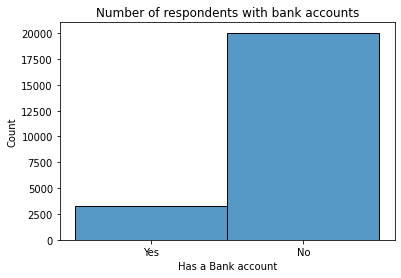

In [14]:
sns.histplot(data = dfE, x='Has a Bank account')
plt.title('Number of respondents with bank accounts')

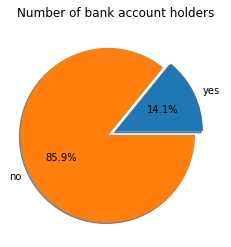

In [15]:
yes =(dfE['Has a Bank account'] == 'Yes').sum()
no = (dfE['Has a Bank account'] == 'No').sum()
labels = 'yes','no'
sizes = [yes,no]
explode = (0, 0.1)
plt.pie(sizes,explode=explode, labels=labels, autopct='%1.1f%%', shadow = True)

plt.title("Number of bank account holders")
plt.show()

In [16]:
#describing the numerica data columns
dfE.describe()


,year,household_size,Respondent Age
count,23343.000000,23343.000000,23343.000000
mean,2016.980594,3.688643,38.805509
std,0.901740,2.281184,16.519803
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


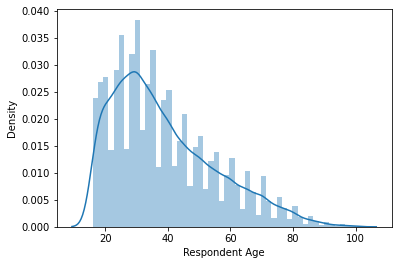

In [17]:
sns.distplot(dfE['Respondent Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


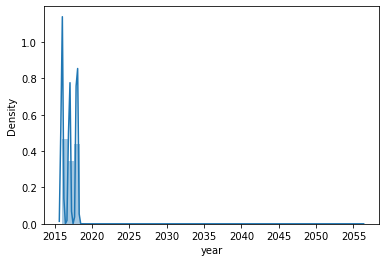

In [18]:
sns.distplot(dfE['year'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


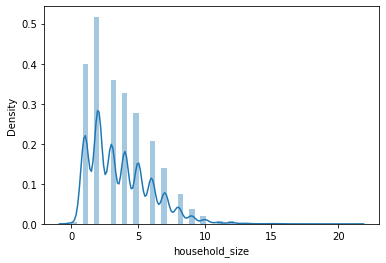

In [19]:
sns.distplot(dfE['household_size'])

In [20]:
#Their variance
dfE[['year','household_size','Respondent Age']].var()

year                0.813136
household_size      5.203798
Respondent Age    272.903908
dtype: float64

In [21]:
#Their skew
dfE[['year','household_size','Respondent Age']].skew()
#all the coullumns are positively skewed

year              4.223164
household_size    0.974109
Respondent Age    0.840662
dtype: float64

In [22]:
#Their kurtosis
dfE[['year','household_size','Respondent Age']].kurt()
#the data coulumns are of a leptokurtic distribution

year              164.914183
household_size      1.153869
Respondent Age      0.098447
dtype: float64

Recommendations

From the inital graph we can see majority of the respondents in the data set do not have a bank account. Only 14% of them do. 

From the statistical calculations done we managed to desphier more patterns from the data set, such as most of the respondents ages range from 49 to 26 years % most household are betwen 2 and 5 in size

# B) Bivariate Analysis

In [23]:
dfE.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [24]:
#Most of the collumns in the dataset are categorical, we will now implement those techniques 
dfE.corr()
#The values for correlation are quite snmall and negative showing a slight correlation

,year,household_size,Respondent Age
year,1.000000,-0.048902,-0.019062
household_size,-0.048902,1.000000,-0.119709
Respondent Age,-0.019062,-0.119709,1.000000


Text(0.5, 1.0, 'Number of respondents')

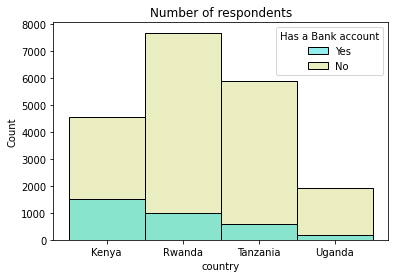

In [33]:
sns.histplot(data = dfE, hue='Has a Bank account', x='country', palette='rainbow')
plt.title('Number of respondents')

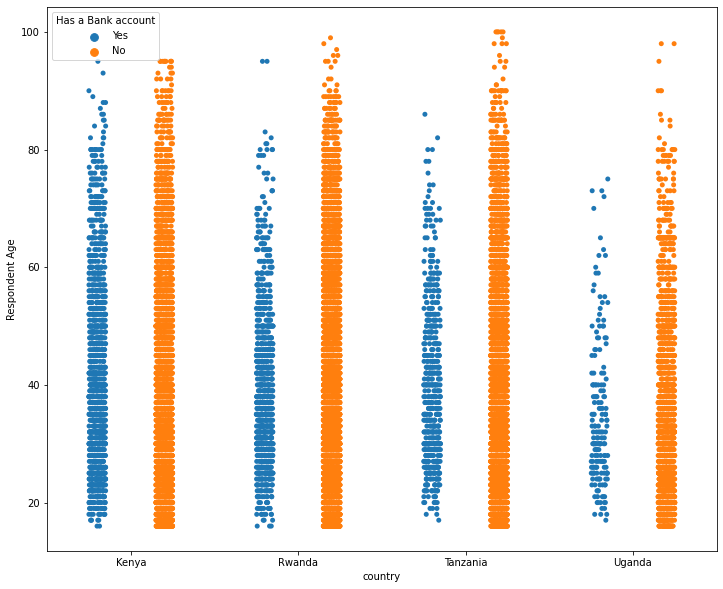

In [26]:
locs = dfE['country']
age = dfE['Respondent Age']
account = dfE['Has a Bank account']
plt.figure(figsize=(12,10))

sns.stripplot(x=locs, y=age, data =dfE, hue=account, dodge=True )
#The graph below shows the dispersion of the data, it is mapping responents ages against their home country. 
#The hues separate them by who has a bank account
#The most country with bank accounts is kenya,mostly in the age group of 20 to 80, with the least being uganda
#

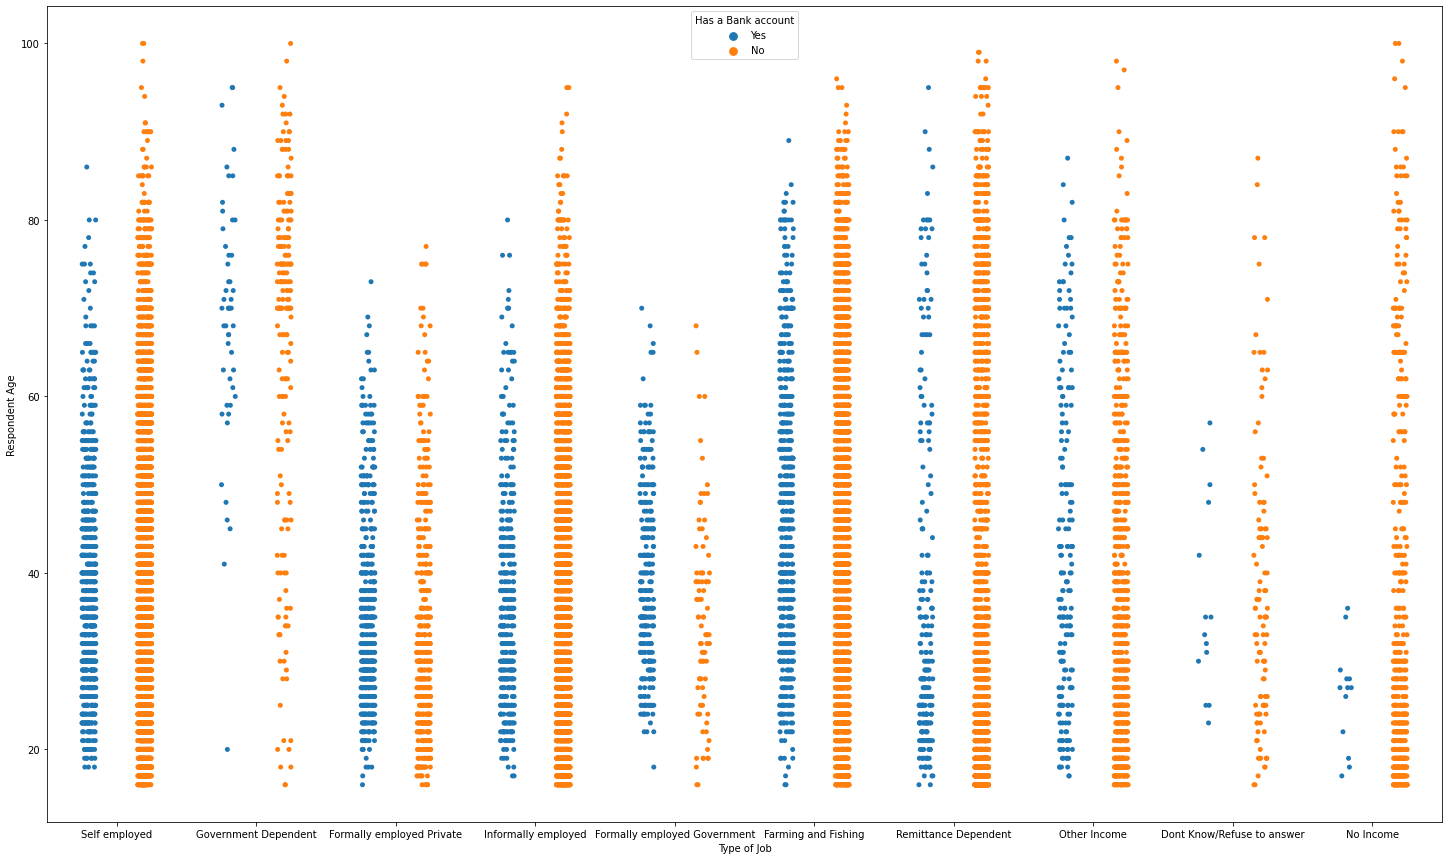

In [41]:
jobs = dfE['Type of Job']
age = dfE['Respondent Age']
account = dfE['Has a Bank account']
plt.figure(figsize=(25,15))

sns.stripplot(x=jobs, y=age, data =dfE, hue=account, dodge=True )
#The below graph shows the spread of data of ages againts employment type
#From it we can tell the self employeed and farmers & fishers
#With people with no income having the least representatives

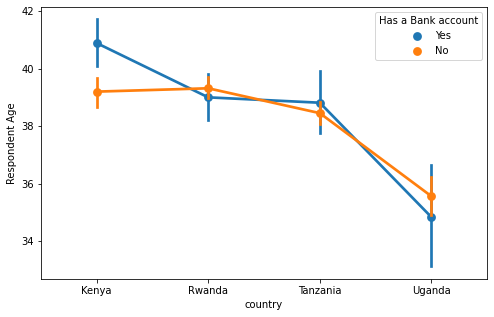

In [28]:
#The below graph llustrates the average of of reposndents per country and each line represents who has a bank account or not
plt.figure(figsize=(8,5))
sns.pointplot(x=locs, y=age,data=dfE, hue=account)
#We can see most of kenyas bank holders are betwen 42 and 40, Rwanda 38 and 40, Tanzania 37 and 40 & Uganda 33 and 37

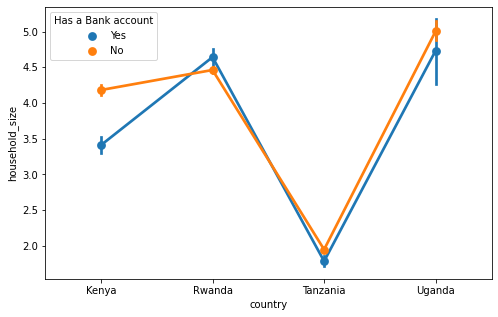

In [29]:
size = dfE['household_size']
plt.figure(figsize=(8,5))
sns.pointplot(x=locs, y=size,data=dfE, hue=account)
#This graph represents the average size of households that have bank accounts, Kenya at 3.4, Rwanda at 4.5, Tanzania at < 2, Uganda at above 4.5

*Recommendations*

The countrys with the most bankers seems to be kenya, followed by Rwanda, then Tanzania and finally Uganda. This shows the more likely demographic a bank holder could be in

#C)  Multivariate Analysis

Data Reduction

**Factor Analysis**

In [42]:
#The first step will be to get rid of the outliers values, select columns with categorical data
dfE.describe()

,year,household_size,Respondent Age
count,23343.000000,23343.000000,23343.000000
mean,2016.980594,3.688643,38.805509
std,0.901740,2.281184,16.519803
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


In [56]:
df = dfE
df

,country,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,uniqueid_1,Yes,Rural,Yes,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,uniqueid_2,No,Rural,No,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,uniqueid_3,Yes,Urban,Yes,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,uniqueid_4,No,Rural,Yes,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,uniqueid_5,No,Urban,No,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,uniqueid_2113,No,Rural,Yes,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,uniqueid_2114,No,Rural,Yes,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,uniqueid_2115,No,Rural,Yes,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,uniqueid_2116,No,Urban,Yes,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed


In [57]:
df.shape

(23343, 11)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23343 entries, 0 to 23523
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23343 non-null  object 
 1   uniqueid                23343 non-null  object 
 2   Has a Bank account      23343 non-null  object 
 3   Type of Location        23343 non-null  object 
 4   Cell Phone Access       23343 non-null  object 
 5   Respondent Age          23343 non-null  float64
 6   gender_of_respondent    23343 non-null  object 
 7   The relathip with head  23343 non-null  object 
 8   marital_status          23343 non-null  object 
 9   Level of Educuation     23343 non-null  object 
 10  Type of Job             23343 non-null  object 
dtypes: float64(1), object(10)
memory usage: 2.8+ MB


In [59]:
#Adequacy Test
# Before we perform factor analysis,weyou need to evaluate the “factorability” of our dataset. 
# Factorability means "can we found the factors in the dataset?". 
# There are two methods to check the factorability or sampling adequacy:
# - Bartlett’s Test
# - Kaiser-Meyer-Olkin Test
# ---
# Bartlett’s test of sphericity checks whether or not the observed variables intercorrelate at all 
# using the observed correlation matrix against the identity matrix. If the test found statistically insignificant, 
# we should not employ a factor analysis.
# ---

# Installing factor analyzer 
!pip install factor_analyzer==0.2.3

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value


(-0.0, 0.0)

With a p result of 0, the test was statistically significant, this inidicates there is sufficuent evidence to assume the observed distribution is not the same as the expected distribution. There might be a relationship betwen the categorical variables

In [61]:
from factor_analyzer.factor_analyzer import calculate_kmo

kmo_all,kmo_model=calculate_kmo(df)

ValueError: ignored

This shows the technique chosen is not right for the dataset

#Moving onto Discriminant Analysis

In [154]:
df2 = dfE
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23343 entries, 0 to 23523
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23343 non-null  int8   
 1   uniqueid                23343 non-null  object 
 2   Has a Bank account      23343 non-null  object 
 3   Type of Location        23343 non-null  object 
 4   Cell Phone Access       23343 non-null  object 
 5   Respondent Age          23343 non-null  float64
 6   gender_of_respondent    23343 non-null  object 
 7   The relathip with head  23343 non-null  object 
 8   marital_status          23343 non-null  object 
 9   Level of Educuation     23343 non-null  object 
 10  Type of Job             23343 non-null  object 
dtypes: float64(1), int8(1), object(9)
memory usage: 2.6+ MB


In [155]:
cleanup = {"Cell Phone Access": {'Yes':1, 'No':0},
           'Has a Bank account': {'No': 0, 'Yes':1},
           'Type of Location': {'Rural':0, "Urban":1},
           'gender_of_respondent': {'Female':0, "Male":1},
           'The relathip with head' : {'Head of Household':0, 'Spouse':1, 'Child':2, 'Parent':3, 'Other relative':4, 'Other non-relatives':5},
           'marital_status': {'Married/Living together':0, 'Single/Never Married':1, 'Widowed':2,'Divorced/Seperated':3, 'Dont know':4},
           'Level of Educuation' : {'Primary education':0, 'No formal education':1, 'Secondary education':2,'Tertiary education':3,'Vocational/Specialised training':4,'6':5,'Other/Dont know/RTA':6},
           'Type of Job' : {'Self employed':0, 'Informally employed':1,'Farming and Fishing':2, 'Remittance Dependent':3, 'Other Income':4, 'Formally employed Private':5,'Government Dependent':6,'Dont Know/Refuse to answer':7,'No Income':8, 'Formally employed Government':9}
           }

In [156]:
df2 = df2.replace(cleanup)
df2.head()

,country,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,0,uniqueid_1,1,0,1,24.0,0,1,0,2,0
1,0,uniqueid_2,0,0,0,70.0,0,0,2,1,6
2,0,uniqueid_3,1,1,1,26.0,1,4,1,4,0
3,0,uniqueid_4,0,0,1,34.0,0,0,0,0,5
4,0,uniqueid_5,0,1,0,26.0,1,2,1,0,1


In [157]:
Y = df2.iloc[:, 2:3]
Y

,Has a Bank account
0,1
1,0
2,1
3,0
4,0
...,...
23519,0
23520,0
23521,0
23522,0


In [158]:
X = df2.drop(['Has a Bank account','uniqueid'], axis = 1)
X.tail()

,country,Type of Location,Cell Phone Access,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,3,0,1,48.0,0,0,3,1,4
23520,3,0,1,27.0,0,0,1,2,4
23521,3,0,1,27.0,0,3,2,0,4
23522,3,1,1,30.0,0,3,3,2,0
23523,3,0,1,20.0,1,2,1,2,8


In [159]:
#Diving the data into training and test sets
#
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size= 0.3, random_state=0)

In [160]:
#Feature Scaling
#
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [161]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [162]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [163]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

[[5887  105]
 [ 747  264]]
Accuracy0.8783378552049121


The model has achieved an accuracy score of 88% in predicting which type of individual based of the dataset provided will most likely have a bank account